In [5]:
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [6]:
dataRaw = pd.read_csv('glass.csv')

In [7]:
dataRaw

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


In [8]:
# Get Label And Features Before Feature Reduction
label=dataRaw.iloc[:,9]
feature=dataRaw.iloc[:,0:9]
feature

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11


# FEATURE REDUCTION

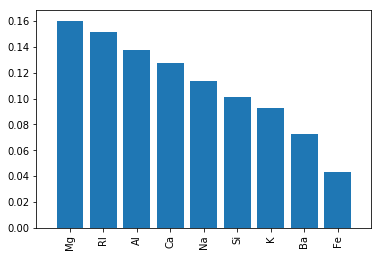

In [9]:
X_train, X_test, y_train, y_test=train_test_split(
    feature, label,random_state=4)

clf=RandomForestClassifier(n_estimators=500, n_jobs=-1)
clf.fit(X_train,y_train)

importances = clf.feature_importances_
features = dataRaw.columns[:9]
sort_indices = np.argsort(importances)[::-1]
sorted_features = []
for idx in sort_indices:
    sorted_features.append(features[idx])
plt.bar(range(len(importances)), importances[sort_indices], align='center');
plt.xticks(range(len(importances)), sorted_features, rotation='vertical');
plt.xlim([-1, len(importances)])
plt.grid(False)

plt.show()

# SELECT TOP 5 FEATURES

In [10]:
top5 = sorted_features[:5]
top5

['Mg', 'RI', 'Al', 'Ca', 'Na']

In [11]:
#take 5 best faetures
X = dataRaw.iloc[:,[2,0,3,6,1,9]]
y = dataRaw.iloc[:,9]
X_train, X_test, y_train, y_test=train_test_split(
    X, y,random_state=3)

In [12]:
# MinMaxScaling Preprocessing
from sklearn.preprocessing import MinMaxScaler
std_scale =MinMaxScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

#KNN Classifier
clf=KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [13]:
#Training Score
print('Training Score: %.2f%%' % (clf.score(X_train, y_train) * 100))
print('Test Score: %.2f%%' % (clf.score(X_test, y_test) * 100))

Training Score: 93.75%
Test Score: 94.44%


In [14]:
#Model Accuration
y_pred=clf.predict(X_test)
y_pred
print("Akurasi Model" , format(np.mean(y_pred==y_test)))

Akurasi Model 0.9444444444444444


In [15]:
# PKL COVERTER
tempRest=[clf, dataRaw]

from sklearn.externals import joblib
joblib.dump(tempRest, 'GlassKnnClassifierBaru.pkl')

['GlassKnnClassifierBaru.pkl']